# Visualizing Neptune Results

In [65]:
run = neptune.init(project='cmbirmingham/active-speaker-exp', run='AC1-112', api_token="eyJhcGlfYWRkcmVzcyI6Imh0dHBzOi8vYXBwLm5lcHR1bmUuYWkiLCJhcGlfdXJsIjoiaHR0cHM6Ly9hcHAubmVwdHVuZS5haSIsImFwaV9rZXkiOiJkMGNhYTRlNi1mYTZhLTQzYzctODNmYi1iNjE4ZGNmZTA2MTkifQ==")

https://app.neptune.ai/cmbirmingham/active-speaker-exp/e/AC1-112


In [66]:
run['artifacts/model.pt'].download(destination='model.pt')

In [67]:
from joblib import dump, load
clf = load("model.pt")

In [95]:
import numpy as np
# example = np.expand_dims(np.random.rand(25*4),0)
example = np.random.rand(20,25*4)
# print(example)
clf.predict(example)

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

Exception in thread Thread-13:
Traceback (most recent call last):
  File "/home/chris/anaconda3/envs/pipeline/lib/python3.8/site-packages/neptune/new/internal/backends/utils.py", line 51, in wrapper
    return func(*args, **kwargs)
  File "/home/chris/anaconda3/envs/pipeline/lib/python3.8/site-packages/neptune/new/internal/backends/hosted_neptune_backend.py", line 229, in ping_run
    self.leaderboard_client.api.ping(experimentId=str(run_uuid)).response().result
  File "/home/chris/anaconda3/envs/pipeline/lib/python3.8/site-packages/bravado/http_future.py", line 239, in response
    six.reraise(*sys.exc_info())
  File "/home/chris/anaconda3/envs/pipeline/lib/python3.8/site-packages/six.py", line 703, in reraise
    raise value
  File "/home/chris/anaconda3/envs/pipeline/lib/python3.8/site-packages/bravado/http_future.py", line 200, in response
    swagger_result = self._get_swagger_result(incoming_response)
  File "/home/chris/anaconda3/envs/pipeline/lib/python3.8/site-packages/bravado

In [96]:
import neptune.new as neptune

project = neptune.get_project('cmbirmingham/active-speaker-exp', api_token="eyJhcGlfYWRkcmVzcyI6Imh0dHBzOi8vYXBwLm5lcHR1bmUuYWkiLCJhcGlfdXJsIjoiaHR0cHM6Ly9hcHAubmVwdHVuZS5haSIsImFwaV9rZXkiOiJkMGNhYTRlNi1mYTZhLTQzYzctODNmYi1iNjE4ZGNmZTA2MTkifQ==")
# my_project = neptune.get_project('my_workspace/my_project')
print(dir(project))
# Get dashboard with runs contributed by 'sophia'
data = project.fetch_runs_table(tag="gru-only").to_pandas()
# print(data["sys/tags",1])
data.head()
print(data.columns)

['__class__', '__delattr__', '__dict__', '__dir__', '__doc__', '__eq__', '__format__', '__ge__', '__getattribute__', '__gt__', '__hash__', '__init__', '__init_subclass__', '__le__', '__lt__', '__module__', '__ne__', '__new__', '__reduce__', '__reduce_ex__', '__repr__', '__setattr__', '__sizeof__', '__str__', '__subclasshook__', '__weakref__', '_as_list', '_backend', '_uuid', 'fetch_runs_table']
Index(['sys/creation_time', 'sys/description', 'sys/hostname', 'sys/id',
       'sys/modification_time', 'sys/name', 'sys/owner', 'sys/ping_time',
       'sys/running_time', 'sys/size', 'sys/state', 'sys/tags',
       'logs/best_so_far_run_score', 'logs/dataset_shape',
       'logs/run_parameters', 'logs/run_score', 'logs/test_loss',
       'logs/test_speaking-AP', 'logs/test_speaking-auROC',
       'logs/test_speaking-conf-FN', 'logs/test_speaking-conf-FP',
       'logs/test_speaking-conf-TN', 'logs/test_speaking-conf-TP',
       'logs/test_speaking-f1-score', 'logs/test_speaking-precision',
  

Error occurred during asynchronous operation processing: Invalid point for string series: monitoring/stdout : Text longer than 1000 characters was truncated


In [97]:
data["tags"] = data["sys/tags"].apply(lambda x: x.split(','))
data["tags"]
df = data.drop('tags', 1).join(data.tags.str.join('|').str.get_dummies())
display(df.head())
df["logs/test_speaking-auROC"]

,sys/creation_time,sys/description,sys/hostname,sys/id,sys/modification_time,sys/name,sys/owner,sys/ping_time,sys/running_time,sys/size,...,monitoring/stdout,5,ang,at,gru,gru-only,head,laptop,perfectmatch,syncnet
0,2021-04-27 10:50:10.548000+00:00,,ilab-raider,AC1-149,2021-04-27 14:06:18.116000+00:00,gru_active-speaker-exp,cmbirmingham,2021-04-27 14:06:17.162000+00:00,11765.498,31872577.0,...,"Num epochs without improvement: 1, patience is 2",1,1,0,1,1,1,1,0,1
1,2021-04-27 05:48:34.353000+00:00,,ilab-raider,AC1-148,2021-04-27 10:50:01.698000+00:00,gru_active-speaker-exp,cmbirmingham,2021-04-27 10:50:01.695000+00:00,18085.638,41532187.0,...,'objective' 2706609.66 ms,1,1,0,1,1,1,1,1,0
2,2021-04-27 00:38:34.659000+00:00,,ilab-raider,AC1-147,2021-04-27 05:48:25.015000+00:00,gru_active-speaker-exp,cmbirmingham,2021-04-27 05:48:21.742000+00:00,18412.399,41891996.0,...,'objective' 3113620.55 ms,1,0,1,1,1,0,1,1,1
3,2021-04-26 20:37:01.533000+00:00,,ilab-raider,AC1-146,2021-04-27 00:38:23.931000+00:00,gru_active-speaker-exp,cmbirmingham,2021-04-27 00:38:23.928000+00:00,14481.028,35666471.0,...,'objective' 1675015.00 ms,1,0,1,1,1,1,1,0,1
4,2021-04-26 15:35:24.493000+00:00,,ilab-raider,AC1-145,2021-04-26 20:36:26.475000+00:00,gru_active-speaker-exp,cmbirmingham,2021-04-26 20:36:26.472000+00:00,18060.249,41507741.0,...,'objective' 1674643.82 ms,1,0,1,1,1,1,1,1,0


0     0.854791
1     0.917478
2     0.927097
3     0.820769
4     0.914064
5     0.829070
6     0.919188
7     0.769820
8     0.922843
9     0.806850
10    0.906592
11    0.905978
12    0.908878
13    0.835375
14    0.919462
15    0.764576
16    0.820337
17    0.909551
18    0.697956
19    0.711984
20    0.793787
21    0.907523
22    0.600845
23    0.702042
24    0.622641
Name: logs/test_speaking-auROC, dtype: float64

Error occurred during asynchronous operation processing: Invalid point for string series: monitoring/stdout : Text longer than 1000 characters was truncated


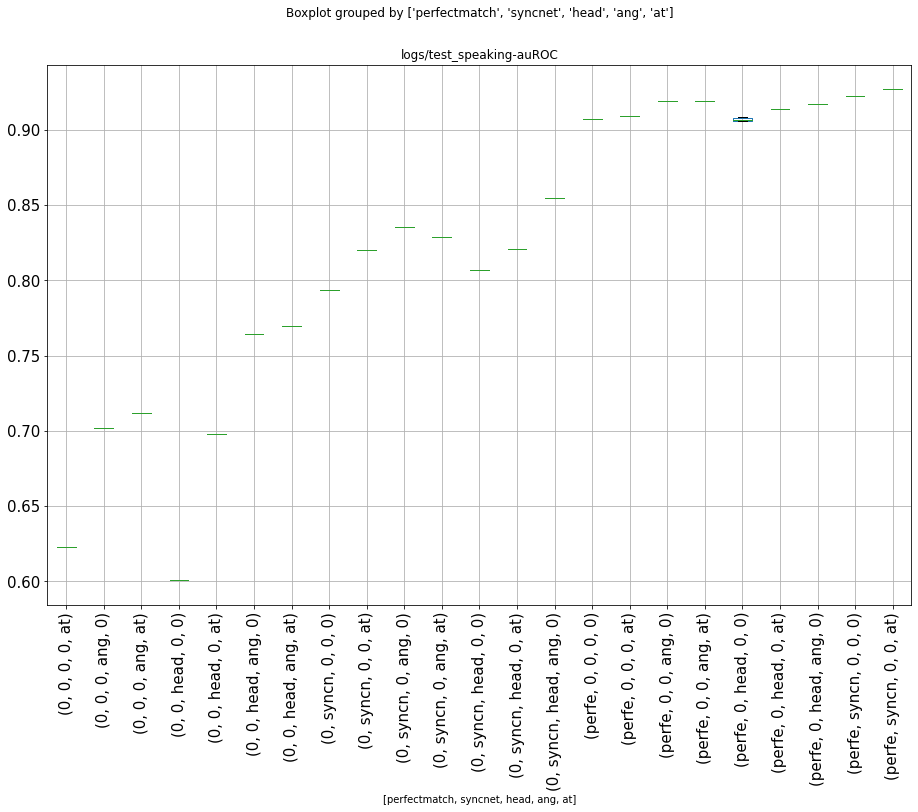

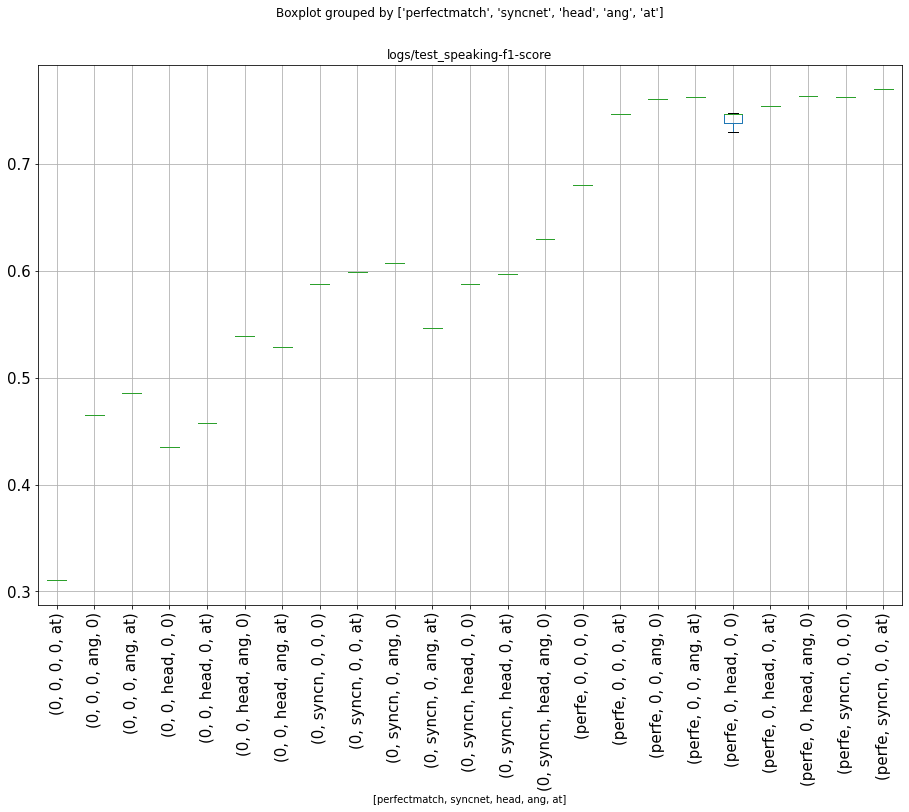

In [98]:
import matplotlib.pyplot as plt

for l in ['at','ang','head','syncnet', 'perfectmatch']:
    df[l] = df[l].astype(str)
    df.loc[df[l]=="1",l] = l[:5]
# display(df.head())
labels = ['perfectmatch', 'syncnet','head','ang','at']
fig, ax = plt.subplots(figsize=(15,10))
boxplot = df.boxplot(column=["logs/test_speaking-auROC"], by=labels, ax = ax, rot=90, fontsize=15)
plt.savefig("XGB-auROC.png")
plt.show()
fig, ax = plt.subplots(figsize=(15,10))
boxplot = df.boxplot(column=["logs/test_speaking-f1-score"], by=labels, ax = ax, rot=90, fontsize=15)
plt.savefig("XGB-F1.png")
plt.show()

In [6]:
import neptune
import pandas as pd
import json 
from neptune.utils import align_channels_on_x
import plotly.graph_objects as go
from pandas.api.types import is_numeric_dtype, is_string_dtype
# Get project
project = neptune.init('cmbirmingham/active-speaker-exp', api_token="eyJhcGlfYWRkcmVzcyI6Imh0dHBzOi8vYXBwLm5lcHR1bmUuYWkiLCJhcGlfdXJsIjoiaHR0cHM6Ly9hcHAubmVwdHVuZS5haSIsImFwaV9rZXkiOiJkMGNhYTRlNi1mYTZhLTQzYzctODNmYi1iNjE4ZGNmZTA2MTkifQ==")

# Download experiments dashboard as pandas DataFrame
data = project.get_leaderboard(tag="xgb-only")
data.head()

# Download project and select experiments
speaking_exps = project.get_experiments(tag='speaking')
my_exp = speaking_exps[1]

data_collected = my_exp.get_logs().keys()
keys_to_use = [k for k in data_collected if "f1" in k or "conf" in k]

print(my_exp.get_tags())
print(my_exp.get_parameters())
df = my_exp.get_numeric_channels_values(*keys_to_use)


DecodeError: It is required that you pass in a value for the "algorithms" argument when calling decode().

In [150]:

def get_text_channel(my_exp, channel_name):    
    channels_by_name = my_exp.get_channels()
    channel_id = channels_by_name[channel_name].id
    s = str(my_exp._backend.get_channel_points_csv(my_exp, channel_id).read())
    l = s.split("\n")[:-1]
    l = [i.split(",",1) for i in l]
    l = [[str(int(i[0][:-2])),i[1].replace("'",'"')] for i in l]
    l = {i[0]:json.loads(i[1]) for i in l}
    df = pd.DataFrame(l)
    df = df.T
    df.reset_index(inplace=True,drop=True)
    for c in df.columns:
        if is_numeric_dtype(df[c]):
            df[c] = pd.to_numeric(df[c])
    return df

def get_numeric_and_text(my_exp, keys_to_use=None):
    data_collected = my_exp.get_logs().keys()
    if not keys_to_use:
        keys_to_use = [k for k in data_collected if "f1" in k or "conf" in k]
    params_df = get_text_channel(my_exp, "run_parameters")
    results_df = my_exp.get_numeric_channels_values(*keys_to_use)
    final = pd.concat([results_df,params_df], axis=1)
    return final
# final = get_numeric_and_text(my_exp)


,x,val_speaking-conf-FN,val_speaking-conf-TP,val_speaking-f1-score,train_speaking-conf-FP,train_speaking-f1-score,test_speaking-conf-TN,val_speaking-conf-TN,train_speaking-conf-TN,test_speaking-conf-FN,...,train_speaking-conf-TP,train_speaking-conf-FN,max_depth,criterion,min_samples,window,max_features,r_win_size,step_size,sub_sample_neg_perc
0,0.0,3641.0,18873.0,0.756827,11256.0,0.896091,48598.0,47687.0,64284.0,3544.0,...,93642.0,10461.0,12,entropy,0.000119333,1,sqrt,28,5,75
1,1.0,250.0,3917.0,0.696603,8.0,0.972733,7060.0,7242.0,5819.0,394.0,...,17338.0,964.0,16,gini,0.000123911,27,auto,10,1,92
2,2.0,204.0,1458.0,0.746735,1417.0,0.821461,3387.0,3337.0,5108.0,332.0,...,5841.0,1122.0,11,gini,0.0342867,17,auto,16,4,74
3,3.0,540.0,5708.0,0.706479,9494.0,0.790942,11315.0,11406.0,21478.0,877.0,...,24747.0,3588.0,14,gini,0.0184381,9,auto,15,2,63
4,4.0,309.0,3710.0,0.730818,5999.0,0.810868,7425.0,7607.0,14998.0,519.0,...,16339.0,1623.0,8,entropy,0.00338956,14,auto,23,2,62
5,5.0,73.0,598.0,0.674944,1058.0,0.789518,1133.0,1166.0,1995.0,122.0,...,2320.0,179.0,4,entropy,0.00111929,28,log2,30,6,72
6,6.0,179.0,1773.0,0.717088,2763.0,0.803523,3556.0,3610.0,6812.0,279.0,...,7480.0,895.0,10,gini,0.00850271,29,log2,25,2,65
7,7.0,123.0,1002.0,0.765178,842.0,0.858503,2307.0,2316.0,3095.0,199.0,...,4059.0,496.0,5,gini,0.00331858,25,sqrt,15,4,78
8,8.0,38.0,864.0,0.653061,2652.0,0.715977,1176.0,1364.0,2883.0,63.0,...,3538.0,155.0,4,gini,0.10728,25,auto,6,5,57
9,9.0,81.0,738.0,0.720703,894.0,0.812618,1540.0,1540.0,2527.0,159.0,...,2808.0,401.0,11,gini,0.0162345,23,log2,9,6,74


In [166]:

def plot_par_cord(df, name='first_figure.html',color_metric='test_speaking-f1-score', columns_to_plot=None):
    dimensions = []
    if not columns_to_plot:
        columns_to_plot = df.columns
    for c in df.columns:
        if "conf" in c:
            continue
        elif is_numeric_dtype(df[c]):
            if "f1" in c or "auROC" in c or "AP" in c:
                r = [0,1]
            else:
                r = [df[c].min(),df[c].max()]
            dimensions.append(dict(
                label = c,
                range = r,
                values= df[c]
            ))
        elif is_string_dtype(df[c]):
            temp = pd.Categorical(df[c])
            dimensions.append(dict(
                label = c,
                tickvals = list(range(len(temp.categories.values))),
                ticktext = temp.categories.values,
                values = temp.codes
            ))


    
    fig = go.Figure(data=
        go.Parcoords(
            line = dict(color = df[color_metric],
                       colorscale = 'Electric',
                       showscale = True,
                       cmin = 0,
                       cmax = 1),
            dimensions = dimensions
        )
    )
    fig.write_html(name, auto_open=True)

In [168]:
# Tags of interest: 

speaking_exps = project.get_experiments(tag=['tcn','taking_yielding_holding_listening'])
for e in speaking_exps:
    print(e.get_tags())
my_exp = speaking_exps[-1]

data_collected = my_exp.get_logs().keys()
keys_to_use = [k for k in data_collected if "f1" in k or "conf" in k]

exp_df = get_numeric_and_text(my_exp, keys_to_use)

plot_par_cord(exp_df, color_metric='test_yielding-f1-score')

['Exp-1', 'pearson-m_hand-f', 'taking_yielding_holding_listening', '15 Trials', '23 Sessions', 'tcn']


In [132]:
len(t.categories.values[:])

2